# Clinic patient data analysis
Returns unique visits, physicians, diagnoses for each patient

In [32]:
import numpy as np
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Load data

In [33]:
icu_df = pd.read_csv("outpatients_deidentified.csv")
icu_df

,Patient_ID,Visit_ID,Primary_Physician,Operating_Physician,Other_Physician,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10
0,00013D2EFD8E45D1,5.421920e+14,4.824842e+09,NaN,NaN,V5841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,5.422720e+14,2.963420e+09,NaN,2.963420e+09,V5832,V5861,2724,3182,V5869,42731,NaN,NaN,NaN,NaN
2,00016F745862898F,5.422820e+14,5.737808e+09,NaN,5.737808e+09,9594,E9174,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001FDD721E223DC,5.426420e+14,1.233848e+09,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00024B3D2352D2D0,5.422420e+14,9.688809e+09,NaN,NaN,6009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,00151A878F9A2C0D,5.423020e+14,3.796479e+09,NaN,5.834128e+09,8470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,00151A878F9A2C0D,5.423320e+14,6.705510e+08,NaN,3.813703e+09,78900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,00151A878F9A2C0D,5.423020e+14,3.115990e+09,NaN,5.464894e+09,V7641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,00157F1570C74E09,5.428620e+14,2.362603e+09,NaN,NaN,3005,30000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Group and count data

Group columns and return count of only unique values. Group results per patient and create a dataframe. 

Group all visits and return only unique visit numbers. 
Map visits to patient id

In [34]:
def unique_visits(group):
    """ Returns number of unique visits for each patient"""
    visits = [group['Visit_ID']]
    return len(pd.concat(visits).unique())

visit_gp = icu_df.groupby("Patient_ID").apply(unique_visits)

visit = pd.DataFrame(visit_gp, columns = ['Total_Visits'])
visit

,Total_Visits
Patient_ID,
00013D2EFD8E45D1,1
00016F745862898F,2
0001FDD721E223DC,1
00024B3D2352D2D0,4
0002F28CE057345B,17
000308435E3E5B76,12
000345A39D4157C9,2
000489E7EAAD463F,2
00048EF1F4791C68,4


Group all types of doctors and get number of unique doctors. Group results per patient

In [35]:
def unique_docs(group):
    """ Returns number of unique doctors for each patient"""
    total_docs = [group['Primary_Physician'], 
                  group['Operating_Physician'], 
                  group['Other_Physician']]
    return len(pd.concat(total_docs).dropna(inplace=False).unique())

doc_gp = icu_df.groupby("Patient_ID").apply(unique_docs)

doc = pd.DataFrame(doc_gp, columns = ['Total_Physicians'])
doc

,Total_Physicians
Patient_ID,
00013D2EFD8E45D1,1
00016F745862898F,2
0001FDD721E223DC,1
00024B3D2352D2D0,4
0002F28CE057345B,21
000308435E3E5B76,6
000345A39D4157C9,3
000489E7EAAD463F,1
00048EF1F4791C68,4


Group all types diagnoses and get number of unique diagnoses per patient. Group results per patient.

In [36]:
def unique_icd(group):
    """ Returns number of unique diagnoses for each patient"""
    total_icd = [group['ICD9_DGNS_CD_1'], 
                group['ICD9_DGNS_CD_2'], 
                group['ICD9_DGNS_CD_3'],
                group['ICD9_DGNS_CD_4'],
                group['ICD9_DGNS_CD_5'],
                group['ICD9_DGNS_CD_6'],
                group['ICD9_DGNS_CD_7'],
                group['ICD9_DGNS_CD_8'],
                group['ICD9_DGNS_CD_9'],
                group['ICD9_DGNS_CD_10']]
    return len(pd.concat(total_icd).dropna(inplace=False).unique())

icd_gp = icu_df.groupby("Patient_ID").apply(unique_icd)

icd = pd.DataFrame(icd_gp, columns = ['Total_Diagnoses'])
icd

,Total_Diagnoses
Patient_ID,
00013D2EFD8E45D1,1
00016F745862898F,9
0001FDD721E223DC,3
00024B3D2352D2D0,4
0002F28CE057345B,45
000308435E3E5B76,28
000345A39D4157C9,9
000489E7EAAD463F,8
00048EF1F4791C68,6


Group all diagnoses and get determine the most common diagnoses. Group results per patient.

In [37]:
def unique_icd(group):
    """ Returns most common diagnosis for each patient"""
    n=1
    total_icd = [group['ICD9_DGNS_CD_1'], 
                group['ICD9_DGNS_CD_2'], 
                group['ICD9_DGNS_CD_3'],
                group['ICD9_DGNS_CD_4'],
                group['ICD9_DGNS_CD_5'],
                group['ICD9_DGNS_CD_6'],
                group['ICD9_DGNS_CD_7'],
                group['ICD9_DGNS_CD_8'],
                group['ICD9_DGNS_CD_9'],
                group['ICD9_DGNS_CD_10']]
    return pd.concat(total_icd).dropna(inplace=False).value_counts().idxmax()
top_gp = icu_df.groupby("Patient_ID").apply(unique_icd)

top = pd.DataFrame(top_gp, columns = ['Most_Freq_Diagnosis'])
top

,Most_Freq_Diagnosis
Patient_ID,
00013D2EFD8E45D1,V5841
00016F745862898F,42731
0001FDD721E223DC,V5866
00024B3D2352D2D0,2723
0002F28CE057345B,4280
000308435E3E5B76,4019
000345A39D4157C9,33829
000489E7EAAD463F,7840
00048EF1F4791C68,72764


## Merge results

Combine all dataframes

In [38]:
two = pd.merge(visit, doc, on='Patient_ID')

In [39]:
three = pd.merge(two, icd, on='Patient_ID')

In [40]:
outpatient_summary = pd.merge(three, top, on='Patient_ID')
outpatient_summary

,Total_Visits,Total_Physicians,Total_Diagnoses,Most_Freq_Diagnosis
Patient_ID,,,,
00013D2EFD8E45D1,1,1,1,V5841
00016F745862898F,2,2,9,42731
0001FDD721E223DC,1,1,3,V5866
00024B3D2352D2D0,4,4,4,2723
0002F28CE057345B,17,21,45,4280
000308435E3E5B76,12,6,28,4019
000345A39D4157C9,2,3,9,33829
000489E7EAAD463F,2,1,8,7840
00048EF1F4791C68,4,4,6,72764


# Visualization

Diagnosis distribution among clinic outpatients

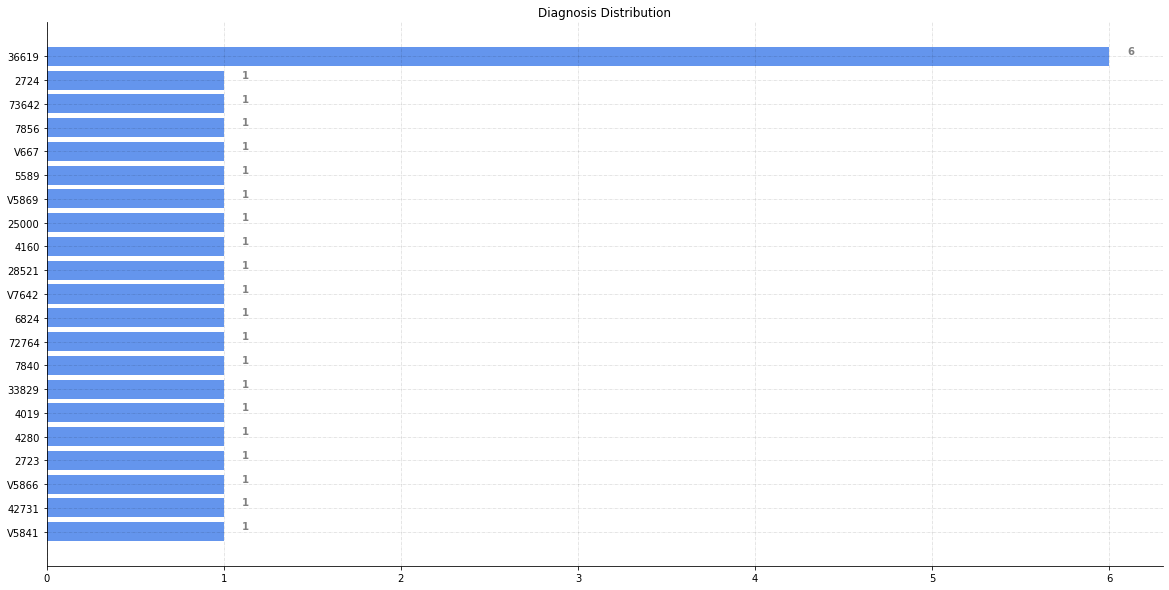

In [85]:
diagnoses = top['Most_Freq_Diagnosis'].unique()
dx_count = top['Most_Freq_Diagnosis'].value_counts()
freq = dx_count.to_list()

# Plot
fig, ax = plt.subplots(figsize =(20, 10))
ax.barh(diagnoses, sorted(freq), color = 'cornflowerblue')

# Gridlines and axes
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(b = True, color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Labels
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Title
ax.set_title('Diagnosis Distribution',
             loc ='center', )

plt.show()

Visit Distribution

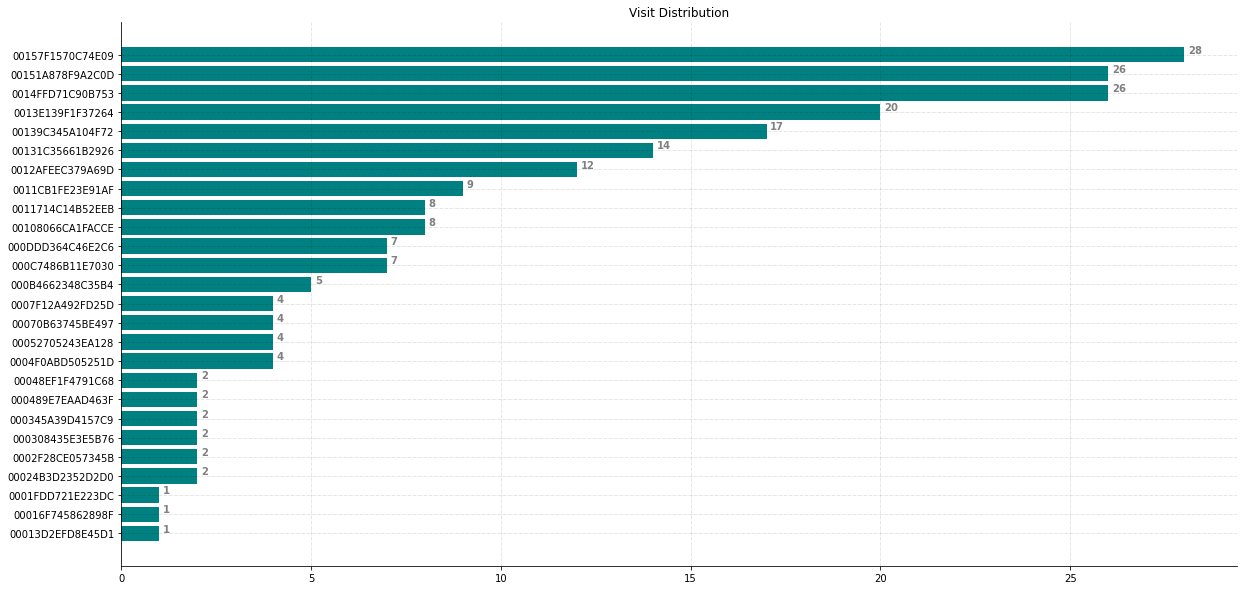

In [82]:
patients = icu_df['Patient_ID'].unique()
total_visits = visit['Total_Visits'] 

# Plot
fig, ax = plt.subplots(figsize =(20, 10))
ax.barh(patients, sorted(total_visits), color = 'teal')

# Gridlines and axes
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(b = True, color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Labels
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Title
ax.set_title('Visit Distribution',
             loc ='center', )

plt.show()

Diagnoses vs Visits

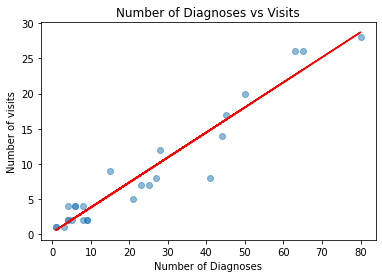

In [96]:
x = icd['Total_Diagnoses']
y = total_visits
plt.scatter(x, y, alpha=0.5)

# Title
plt.title("Number of Diagnoses vs Visits")

# Axes
plt.xlabel('Number of Diagnoses')
plt.ylabel('Number of visits')

# Regression line
m, b = np.polyfit(x, y, 1)
plt.plot (x, m*x+b, color = 'r')

plt.show()

## End of session